# 순환 신경망으로 IMDB 리뷰 분류하기

In [2]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf # TensorFlow 라이브러리 임포트

tf.keras.utils.set_random_seed(42) # 케라스의 랜덤 시드 설정

## IMDB 리뷰 데이터셋

In [3]:
from tensorflow.keras.datasets import imdb # IMDB 데이터셋 임포트

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=200) # 상위 200개의 단어만 사용하여 IMDB 데이터셋 로드

In [4]:
print(train_input.shape, test_input.shape) # 훈련 데이터와 테스트 데이터의 입력 형태 출력

(25000,) (25000,)


In [5]:
print(len(train_input[0])) # 첫 번째 훈련 데이터의 길이 출력

218


In [6]:
print(len(train_input[1])) # 두 번째 훈련 데이터의 길이 출력

189


In [7]:
print(train_input[0]) # 첫 번째 훈련 데이터의 내용 출력

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [8]:
print(train_target[:20]) # 훈련 데이터의 첫 20개 타겟 값 출력

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [9]:
# 훈련 데이터를 훈련 세트와 검증 세트로 분할하기 위해 train_test_split 함수 임포트
from sklearn.model_selection import train_test_split 

# 훈련 데이터를 80%는 훈련 세트로, 20%는 검증 세트로 분할
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42) 

In [10]:
import numpy as np # NumPy 라이브러리 임포트

lengths = np.array([len(x) for x in train_input]) # 각 훈련 데이터의 길이를 배열로 변환

In [11]:
print(np.mean(lengths), np.median(lengths)) # 평균과 중앙값 출력

239.00925 178.0


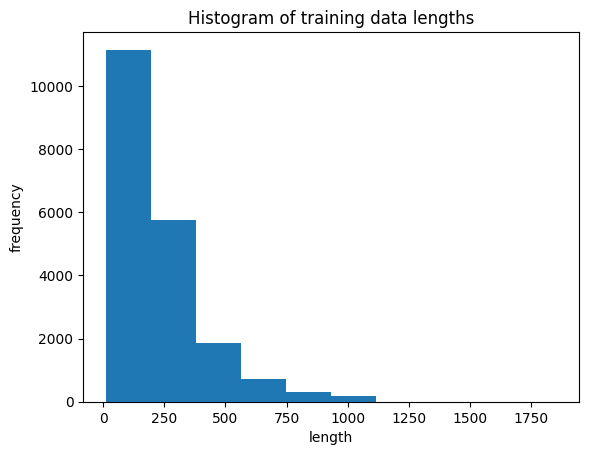

In [12]:
import matplotlib.pyplot as plt # 히스토그램을 그리기 위해 matplotlib.pyplot 임포트

plt.hist(lengths) # 훈련 데이터 길이의 히스토그램 그리기
plt.xlabel('length') # x축 레이블 설정
plt.ylabel('frequency') # y축 레이블 설정
plt.title('Histogram of training data lengths') # 그래프 제목 설정
plt.show() # 히스토그램을 보여줍니다.

In [13]:
# 훈련 데이터를 패딩하여 길이를 맞추기 위해 pad_sequences 함수 임포트
from tensorflow.keras.preprocessing.sequence import pad_sequences 

train_seq = pad_sequences(train_input, maxlen=100) # 훈련 데이터를 최대 길이 100으로 패딩

In [14]:
print(train_seq.shape) # 패딩된 훈련 데이터의 형태 출력

(20000, 100)


In [15]:
print(train_seq[0]) # 패딩된 첫 번째 훈련 데이터의 내용 출력

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [16]:
print(train_input[0][-10:]) # 첫 번째 훈련 데이터의 마지막 10개 단어 출력

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [17]:
print(train_seq[5]) # 패딩된 여섯 번째 훈련 데이터의 내용 출력

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71   2   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14   2  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94   2   2  10  10  87   2  34  49   2   7   2   2   2
   2   2   2   2  46  48  64  18   4   2]


In [18]:
val_seq = pad_sequences(val_input, maxlen=100) # 검증 데이터를 최대 길이 100으로 패딩

## 순환 신경망 만들기

In [34]:
from tensorflow import keras # 케라스 라이브러리 임포트

model = keras.Sequential() # 순차 모델 생성

# 100개의 타임스텝과 200개의 입력 차원을 갖는 RNN 레이어 추가
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 200))) 

# 출력 레이어 추가, 활성화 함수로 시그모이드 사용
model.add(keras.layers.Dense(1, activation='sigmoid')) 

In [20]:
train_oh = keras.utils.to_categorical(train_seq) # 훈련 데이터를 원-핫 인코딩으로 변환

In [21]:
print(train_oh.shape) # 원-핫 인코딩된 훈련 데이터의 형태 출력

(20000, 100, 200)


In [22]:
print(train_oh[0][0][:12]) # 원-핫 인코딩된 첫 번째 훈련 데이터의 첫 12개 단어 출력

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [23]:
print(np.sum(train_oh[0][0])) # 첫 번째 훈련 데이터의 첫 번째 단어의 원-핫 인코딩 값의 합계 출력

1.0


In [24]:
val_oh = keras.utils.to_categorical(val_seq) # 검증 데이터를 원-핫 인코딩으로 변환

In [25]:
model.summary() # 모델 요약 출력

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

## 순환 신경망 훈련하기

In [26]:
# RMSprop 옵티마이저 생성, 학습률은 0.0001로 설정
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) 

# 모델 컴파일, 손실 함수로 이진 교차 엔트로피 사용, 정확도 메트릭 추가
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy']) 

# 모델 체크포인트 콜백 생성, 최상의 모델만 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('models/best-simplernn-model.keras',
                                                save_best_only=True) 

# 조기 종료 콜백 생성, 3번의 에폭 동안 개선이 없으면 훈련 중단, 최상의 가중치 복원
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True) 

# 모델 훈련, 에폭 수는 100, 배치 크기는 64, 검증 데이터와 콜백 함수 사용
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb]) 

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4945 - loss: 0.7135 - val_accuracy: 0.4924 - val_loss: 0.7053
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5020 - loss: 0.7038 - val_accuracy: 0.4960 - val_loss: 0.7010
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5059 - loss: 0.6993 - val_accuracy: 0.4962 - val_loss: 0.6984
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5124 - loss: 0.6964 - val_accuracy: 0.5038 - val_loss: 0.6962
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5154 - loss: 0.6943 - val_accuracy: 0.5110 - val_loss: 0.6939
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5195 - loss: 0.6925 - val_accuracy: 0.5120 - val_loss: 0.6925
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5228 - loss: 0.6915 - val_accuracy: 0.5162 - val_loss: 0.6917
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5255 - loss: 0.6905 - 

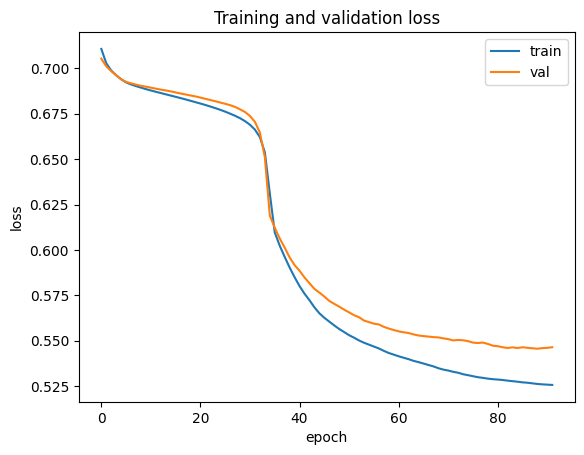

In [27]:
plt.plot(history.history['loss']) # 훈련 손실 그래프 그리기
plt.plot(history.history['val_loss']) # 검증 손실 그래프 그리기
plt.xlabel('epoch') # x축 레이블 설정
plt.ylabel('loss') # y축 레이블 설정
plt.title('Training and validation loss') # 그래프 제목 설정
plt.legend(['train', 'val']) # 범례 추가
plt.show() # 훈련 손실과 검증 손실 그래프를 보여줍니다.

## 단어 임베딩을 사용하기

In [31]:
model2 = keras.Sequential() # 새로운 순차 모델 생성

model2.add(keras.layers.Embedding(200, 16, input_shape=(100,))) # 200개의 단어를 16차원 임베딩으로 변환하는 임베딩 레이어 추가
model2.add(keras.layers.SimpleRNN(8)) # 8개의 유닛을 갖는 순환 신경망 레이어 추가
model2.add(keras.layers.Dense(1, activation='sigmoid')) # 출력 레이어 추가, 활성화 함수로 시그모이드 사용

model2.summary() # 모델 요약 출력

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 16)        │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,409 (13.32 KB)

 Trainable params: 3,409 (13.32 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) # RMSprop 옵티마이저 생성, 학습률은 0.0001로 설정

# 모델 컴파일, 손실 함수로 이진 교차 엔트로피 사용, 정확도 메트릭 추가
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy']) 

# 모델 체크포인트 콜백 생성, 최상의 모델만 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('models/best-embedding-model.keras',
                                                save_best_only=True) 

# 조기 종료 콜백 생성, 3번의 에폭 동안 개선이 없으면 훈련 중단, 최상의 가중치 복원
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True) 

# 모델 훈련, 에폭 수는 100, 배치 크기는 64, 검증 데이터와 콜백 함수 사용
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb]) 

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5221 - loss: 0.6924 - val_accuracy: 0.5890 - val_loss: 0.6807
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5815 - loss: 0.6807 - val_accuracy: 0.6354 - val_loss: 0.6698
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6212 - loss: 0.6688 - val_accuracy: 0.6522 - val_loss: 0.6592
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6509 - loss: 0.6564 - val_accuracy: 0.6768 - val_loss: 0.6449
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6669 - loss: 0.6429 - val_accuracy: 0.6708 - val_loss: 0.6377
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6828 - loss: 0.6303 - val_accuracy: 0.6720 - val_loss: 0.6301
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6916 - loss: 0.6197 - val_accuracy: 0.6902 - val_loss: 0.6150
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6988 - loss: 0.6087 - 

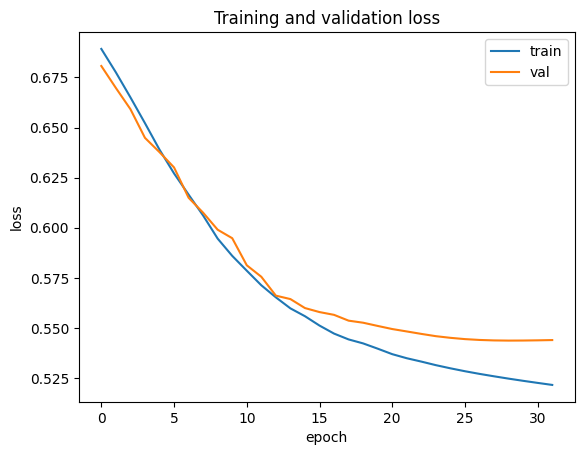

In [33]:
plt.plot(history.history['loss']) # 훈련 손실 그래프 그리기
plt.plot(history.history['val_loss']) # 검증 손실 그래프 그리기
plt.xlabel('epoch') # x축 레이블 설정
plt.ylabel('loss') # y축 레이블 설정
plt.title('Training and validation loss') # 그래프 제목 설정
plt.legend(['train', 'val']) # 범례 추가
plt.show() # 훈련 손실과 검증 손실 그래프를 보여줍니다.